Copyright CNES

## Read and plot a SWOT-HR River Single Pass Node product
In this notebook, we show how to read the SWOT-HR River Single Pass Node vector product with geopandas and how to represent a variable 

### Libraries


In [1]:
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read a SWOT-HR River Single Pass Node product
Note this is an extraction of the original file for demonstration purpose. It does not contain all variables and geometries

In [2]:
dir_swot = "../docs/data/swot"
file_swot_reach = os.path.join(
    dir_swot,
    "SWOT_L2_HR_RiverSP_Node",
    "SWOT_L2_HR_RiverSP_Node_015_033_SA_20240509T114031_20240509T114037_PIC0_01_extract.shp"
)
# read data with geopandas
gdf = gpd.read_file(file_swot_reach)
gdf.head()


,reach_id,node_id,time,time_tai,time_str,lat,lon,lat_u,lon_u,river_name,...,p_wse,p_wse_var,p_width,p_wid_var,p_dist_out,p_length,p_dam_id,p_n_ch_max,p_n_ch_mod,geometry
0,61670400011,61670400010021,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,no_data,...,26.30,0.903124,1346.5,43841.889,89060.0,209.914761,0,6,4,POINT (-53.05041 5.04232)
1,61670400011,61670400010031,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,no_data,...,28.85,1.560599,1113.0,8111.040,89242.0,181.795020,0,6,6,POINT (-53.04892 5.04327)
2,61670400011,61670400010041,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,no_data,...,28.85,4.334997,1251.5,274635.139,89423.0,181.795020,0,7,4,POINT (-53.04744 5.04427)
3,61670400023,61670400020013,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,no_data,...,31.40,0.000000,1790.0,80519.222,89631.0,207.997647,0,7,6,POINT (-53.04582 5.04538)
4,61670400023,61670400020023,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,no_data,...,31.40,0.000000,1633.0,12914.640,89828.0,196.101754,0,6,5,POINT (-53.04433 5.04494)


Not a number values are loaded as floats, it is safer to replace them by actual NaN


In [4]:
fill_value = gdf.lat.min()
gdf.replace(fill_value, np.nan, inplace=True)
gdf.head()

,reach_id,node_id,time,time_tai,time_str,lat,lon,lat_u,lon_u,river_name,...,p_wse,p_wse_var,p_width,p_wid_var,p_dist_out,p_length,p_dam_id,p_n_ch_max,p_n_ch_mod,geometry
0,61670400011,61670400010021,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,NaN,NaN,NaN,NaN,no_data,...,26.30,0.903124,1346.5,43841.889,89060.0,209.914761,0,6,4,POINT (-53.05041 5.04232)
1,61670400011,61670400010031,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,NaN,NaN,NaN,NaN,no_data,...,28.85,1.560599,1113.0,8111.040,89242.0,181.795020,0,6,6,POINT (-53.04892 5.04327)
2,61670400011,61670400010041,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,NaN,NaN,NaN,NaN,no_data,...,28.85,4.334997,1251.5,274635.139,89423.0,181.795020,0,7,4,POINT (-53.04744 5.04427)
3,61670400023,61670400020013,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,NaN,NaN,NaN,NaN,no_data,...,31.40,0.000000,1790.0,80519.222,89631.0,207.997647,0,7,6,POINT (-53.04582 5.04538)
4,61670400023,61670400020023,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,NaN,NaN,NaN,NaN,no_data,...,31.40,0.000000,1633.0,12914.640,89828.0,196.101754,0,6,5,POINT (-53.04433 5.04494)


### 3. Plot data on maps
The most straightforward is to use native geopandas methods.
Check out geopandas documentation for more options: https://geopandas.org/en/v0.9.0/docs/user_guide/mapping.html

<Axes: >

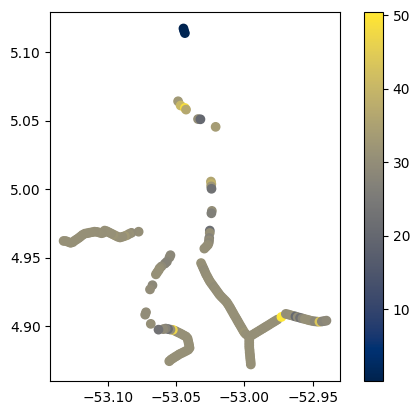

In [5]:
fig, ax = plt.subplots(1, 1)
gdf.plot('wse', ax=ax, legend=True, cmap='cividis')